In [7]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
target_names = data.target_names

# Standardizing the features
X_std = StandardScaler().fit_transform(X)


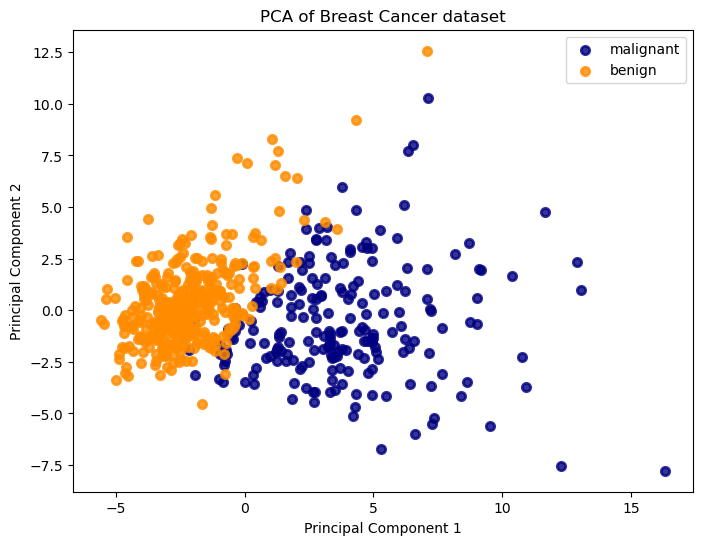

In [4]:
# PCA transformation
pca = PCA(n_components=2)  # We project down to two dimensions.
X_pca = pca.fit_transform(X_std)

# Plotting the results
plt.figure(figsize=(8, 6))
colors = ['navy', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Breast Cancer dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


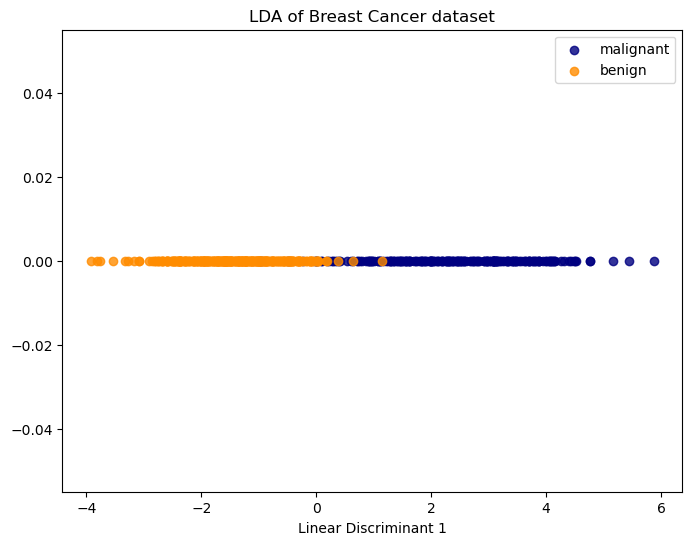

In [10]:
lda = LDA(n_components=1)  # Correcting the number of components to 1
X_lda = lda.fit_transform(X_std, y)

# Plotting the results of LDA
plt.figure(figsize=(8, 6))
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_lda[y == i, 0], np.zeros_like(X_lda[y == i, 0]), alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of Breast Cancer dataset')
plt.xlabel('Linear Discriminant 1')
# The second dimension is not applicable here as LDA can only extract (classes-1) dimensions
plt.show()



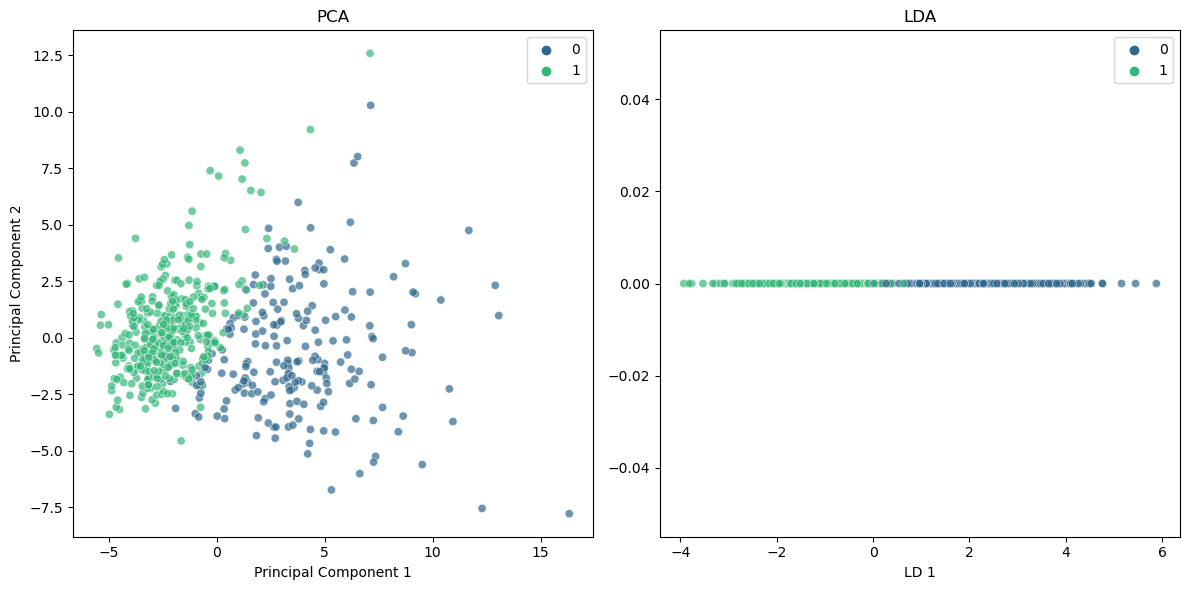

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
data = load_breast_cancer()
X = data.data
y = data.target
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
principal_components_pca = pca.fit_transform(X_scaled)
lda = LDA(n_components=1)
principal_components_lda = lda.fit_transform(X_scaled, y)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('PCA')
sns.scatterplot(
    x=principal_components_pca[:, 0], 
    y=principal_components_pca[:, 1], 
    hue=y, 
    palette='viridis', 
    alpha=0.7
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.subplot(1, 2, 2)
plt.title('LDA')
sns.scatterplot(
    x=principal_components_lda[:, 0], 
    y=np.zeros_like(principal_components_lda[:, 0]),
    hue=y, 
    palette='viridis', 
    alpha=0.7
)
plt.xlabel('LD 1')
plt.ylabel('')
plt.tight_layout()
plt.show()

